In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from datetime import datetime

In [3]:
train=pd.read_csv('/kaggle/input/brist1d/train.csv')
test=pd.read_csv('/kaggle/input/brist1d/test.csv')
train.shape,test.shape

((177024, 508), (3644, 507))

In [4]:
train.head()

,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


In [5]:
train.columns

Index(['id', 'p_num', 'time', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40',
       'bg-5:35', 'bg-5:30', 'bg-5:25',
       ...
       'activity-0:40', 'activity-0:35', 'activity-0:30', 'activity-0:25',
       'activity-0:20', 'activity-0:15', 'activity-0:10', 'activity-0:05',
       'activity-0:00', 'bg+1:00'],
      dtype='object', length=508)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177024 entries, 0 to 177023
Columns: 508 entries, id to bg+1:00
dtypes: float64(433), object(75)
memory usage: 686.1+ MB


In [7]:
train.describe()

,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,bg-5:20,bg-5:15,bg-5:10,...,cals-0:40,cals-0:35,cals-0:30,cals-0:25,cals-0:20,cals-0:15,cals-0:10,cals-0:05,cals-0:00,bg+1:00
count,149770.000000,158533.000000,163364.000000,149766.000000,158254.000000,163770.000000,149763.000000,157973.000000,164174.000000,149771.000000,...,141694.000000,141706.000000,141713.000000,141722.000000,141732.000000,141741.000000,141751.000000,141761.000000,141767.000000,177024.000000
mean,8.211018,8.230449,8.253291,8.210988,8.229649,8.254083,8.211049,8.228888,8.254602,8.211000,...,9.364063,9.364096,9.362525,9.366591,9.368108,9.366998,9.370010,9.372536,9.368960,8.277045
std,2.852188,2.913438,2.945594,2.852090,2.911313,2.947651,2.852212,2.909304,2.949689,2.852315,...,8.012264,8.012681,8.017508,8.018465,8.018349,8.023788,8.021999,8.023280,8.023327,2.996398
min,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,2.200000,...,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,2.200000
25%,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,6.100000,...,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,5.600000,6.100000
50%,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,7.600000,7.700000,7.600000,...,6.180000,6.180000,6.170000,6.180000,6.180000,6.180000,6.180000,6.180000,6.180000,7.700000
75%,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,9.800000,...,9.060000,9.060000,9.050000,9.060000,9.060000,9.060000,9.060000,9.070000,9.060000,9.900000
max,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,25.100000,27.800000,22.200000,...,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,116.100000,27.800000


In [8]:
train.isnull().sum()

id                    0
p_num                 0
time                  0
bg-5:55           27254
bg-5:50           18491
                  ...  
activity-0:15    174293
activity-0:10    174287
activity-0:05    174271
activity-0:00    174287
bg+1:00               0
Length: 508, dtype: int64

In [9]:
train_missing = train.isnull().mean()*100

columns_to_drop = train_missing[train_missing > 25].index

In [10]:
columns_to_drop.shape

(288,)

In [11]:
train_cleaned = train.drop(columns=columns_to_drop)
test_cleaned = test.drop(columns=columns_to_drop)

train_cleaned.shape,test_cleaned.shape

((177024, 220), (3644, 219))

In [12]:
print(f"Columns dropped: {columns_to_drop}")
print("Updated df_train:",train_cleaned.shape)
print("Updated df_test:",test_cleaned.shape)

Columns dropped: Index(['carbs-5:55', 'carbs-5:50', 'carbs-5:45', 'carbs-5:40', 'carbs-5:35',
       'carbs-5:30', 'carbs-5:25', 'carbs-5:20', 'carbs-5:15', 'carbs-5:10',
       ...
       'activity-0:45', 'activity-0:40', 'activity-0:35', 'activity-0:30',
       'activity-0:25', 'activity-0:20', 'activity-0:15', 'activity-0:10',
       'activity-0:05', 'activity-0:00'],
      dtype='object', length=288)
Updated df_train: (177024, 220)
Updated df_test: (3644, 219)


In [13]:
train_cleaned = train_cleaned.drop('id', axis=1)
test_cleaned = test_cleaned.drop('id', axis=1)

In [14]:
def convert_time_columns(train_cleaned):
    for col in train_cleaned.columns:
        if pd.api.types.is_datetime64_any_dtype(train_cleaned[col]) or 'time' in col.lower():
            train_cleaned[col] = pd.to_datetime(train_cleaned[col], errors='coerce')
            train_cleaned[col+'_hour'] = train_cleaned[col].dt.hour
            train_cleaned[col+'_minute'] = train_cleaned[col].dt.minute
            train_cleaned[col+'_second'] = train_cleaned[col].dt.second
            train_cleaned.drop(col, axis=1, inplace=True)
            
convert_time_columns(train_cleaned)
convert_time_columns(test_cleaned)

In [15]:
unique_pnums = test_cleaned['p_num'].unique()
pnum_mapping = {value: idx for idx, value in enumerate(unique_pnums)}
test_cleaned['p_num'] = test_cleaned['p_num'].map(pnum_mapping)

if 'p_num' in train_cleaned.columns:
    train_cleaned['p_num'] = train_cleaned['p_num'].map(pnum_mapping)

In [16]:
print(train_cleaned.shape)
print(test_cleaned.shape)

(177024, 221)
(3644, 220)


In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')

train_imputed = imputer.fit_transform(train_cleaned)
test_imputed = imputer.fit_transform(test_cleaned)

train_cleaned = pd.DataFrame(train_imputed, columns=train_cleaned.columns)
test_cleaned = pd.DataFrame(test_imputed, columns=test_cleaned.columns)


train_float_columns = train_cleaned.select_dtypes(include=['float64', 'float32']).columns.tolist()
test_float_columns = test_cleaned.select_dtypes(include=['float64', 'float32']).columns.tolist()

train_cleaned[train_float_columns] = train_cleaned[train_float_columns].astype(float)
test_cleaned[test_float_columns] = test_cleaned[test_float_columns].astype(float)

print(train_cleaned.dtypes)
print(train_cleaned.columns)

p_num          float64
bg-5:55        float64
bg-5:50        float64
bg-5:45        float64
bg-5:40        float64
                ...   
cals-0:00      float64
bg+1:00        float64
time_hour      float64
time_minute    float64
time_second    float64
Length: 221, dtype: object
Index(['p_num', 'bg-5:55', 'bg-5:50', 'bg-5:45', 'bg-5:40', 'bg-5:35',
       'bg-5:30', 'bg-5:25', 'bg-5:20', 'bg-5:15',
       ...
       'cals-0:25', 'cals-0:20', 'cals-0:15', 'cals-0:10', 'cals-0:05',
       'cals-0:00', 'bg+1:00', 'time_hour', 'time_minute', 'time_second'],
      dtype='object', length=221)


In [18]:
train_cleaned.isnull().sum()

p_num          0
bg-5:55        0
bg-5:50        0
bg-5:45        0
bg-5:40        0
              ..
cals-0:00      0
bg+1:00        0
time_hour      0
time_minute    0
time_second    0
Length: 221, dtype: int64

In [19]:
test_cleaned.isnull().sum()

p_num          0
bg-5:55        0
bg-5:50        0
bg-5:45        0
bg-5:40        0
              ..
cals-0:05      0
cals-0:00      0
time_hour      0
time_minute    0
time_second    0
Length: 220, dtype: int64

In [20]:
x_train = train_cleaned.drop('bg+1:00', axis=1)
y_train = train_cleaned['bg+1:00']

In [24]:
x_train_split, x_val, y_train_split, y_val = train_test_split(x_train, y_train, test_size = 0.2 , random_state = 42)

In [25]:
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.inspection import permutation_importance

model = HistGradientBoostingRegressor()
model.fit(x_train_split, y_train_split)

result = permutation_importance(model, x_val, y_val, n_repeats=30, random_state=42)

feature_importances = pd.DataFrame({
    'Feature': x_train.columns,
    'Importance': result.importances_mean
})

threshold = 0.000509

selected_features = feature_importances[feature_importances['Importance'] > threshold]

selected_features = selected_features.sort_values(by='Importance', ascending=False)

print("Selected Features from Permutation Importance:")
print(selected_features)
print(feature_importances.describe())

selected_indices = [x_train.columns.tolist().index(f) for f in selected_features['Feature']]
x_train_split = x_train_split.iloc[:, selected_indices]
x_val = x_val.iloc[:, selected_indices]

scaler = StandardScaler()
x_train_split = scaler.fit_transform(x_train_split)
x_val = scaler.transform(x_val)

Selected Features from Permutation Importance:
          Feature  Importance
72        bg-0:00    1.246035
71        bg-0:05    0.043319
0           p_num    0.040112
69        bg-0:15    0.029406
217     time_hour    0.028727
66        bg-0:30    0.004409
70        bg-0:10    0.003121
142  insulin-0:10    0.002393
143  insulin-0:05    0.002334
141  insulin-0:15    0.002286
140  insulin-0:20    0.002140
136  insulin-0:40    0.002082
139  insulin-0:25    0.001790
138  insulin-0:30    0.001747
133  insulin-0:55    0.001462
216     cals-0:00    0.001315
137  insulin-0:35    0.001298
135  insulin-0:45    0.001187
63        bg-0:45    0.001131
68        bg-0:20    0.001114
60        bg-1:00    0.001094
46        bg-2:10    0.001001
144  insulin-0:00    0.000993
145     cals-5:55    0.000942
134  insulin-0:50    0.000916
214     cals-0:10    0.000863
130  insulin-1:10    0.000859
1         bg-5:55    0.000835
73   insulin-5:55    0.000831
45        bg-2:15    0.000783
54        bg-1:30    0.

In [26]:
model = HistGradientBoostingRegressor(
    max_iter=210, 
    learning_rate=0.15,
    scoring = "neg_root_mean_squared_error",
    random_state=42
)

model.fit(x_train_split, y_train_split)

y_pred = model.predict(x_val)

mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)

r2 = r2_score(y_val, y_pred)
rmse = np.sqrt(mse)

print(f'Mean Absolute Error: {mae:.5f}')
print(f'Mean Squared Error: {mse:.5f}')
print(f"R2 Score: {r2:.5f}")
print(f"RMSE: {rmse:.5f}")

Mean Absolute Error: 1.35147
Mean Squared Error: 3.35126
R2 Score: 0.62949
RMSE: 1.83064


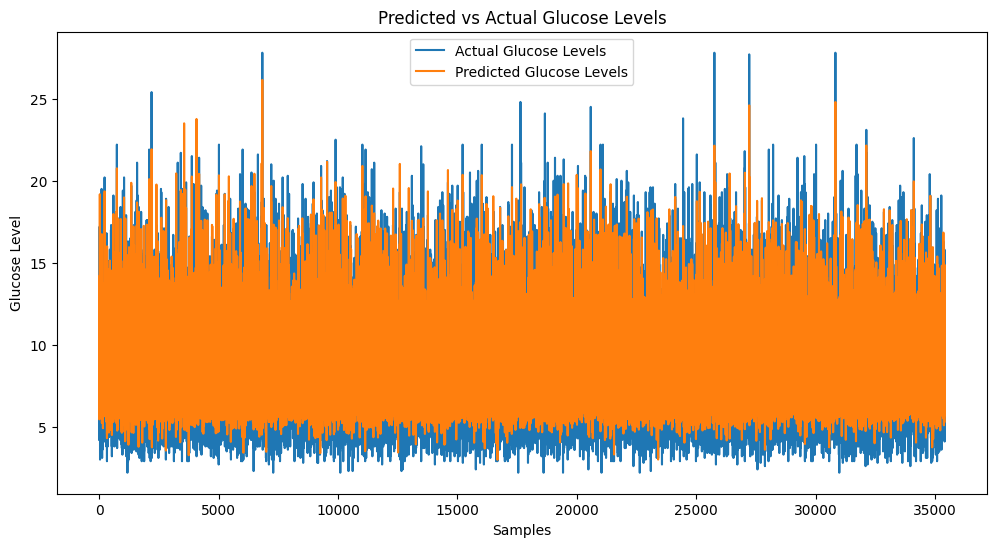

In [27]:
plt.figure(figsize=(12, 6))
plt.plot(y_val.values, label='Actual Glucose Levels')
plt.plot(y_pred, label='Predicted Glucose Levels')
plt.xlabel('Samples')
plt.ylabel('Glucose Level')
plt.title('Predicted vs Actual Glucose Levels')
plt.legend()
plt.show()

In [28]:
x_test = test_cleaned.drop('bg+1:00', axis=1, errors='ignore')
x_test = x_test.iloc[:, selected_indices]
x_test = scaler.transform(x_test)
test_predictions = model.predict(x_test)

In [29]:
submission = pd.DataFrame({'id': test['id'], 'bg+1:00': test_predictions})
submission.to_csv(f'/kaggle/working/submission.csv', index=False)

In [30]:
print("Model training, evaluation, and test predictions completed.")

Model training, evaluation, and test predictions completed.
